<a href="https://colab.research.google.com/github/azzzile/modis_proba/blob/main/kostromina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект по летней практике "Introduction to NLP and CV"
## **студентик:** Костромина Елизавета, г238, бПМИ

**краткое вступление:**

В общем на определение направления потратилось миллион и еще сто часов, потому что хотелось что-то с ДЗЗ, что-то не суперзаезженное, а мне казалось, что любую тему, которую я выдумываю, уже все декаду назад реализовали и живут себе 🥲. Смешной интересный прикол так мной и не придумался, поэтому в процессе выбор пал не в пользу свершения какого-то научного открытия (а могло ли оно быть? ахаха), а в пользу практики и отработки навыков анализа изображений.

А еще может быть...! может быть это превратится в какую-нибудь курсовую...))))



**имелся данный надоплан:**

0. Постановка задачи
1. Анализ существующих решений
2. Сбор даты
3. Обучение модели
4. Методы улучшения результата
5. Итоги и карта гитхаба






## 0. Постановка задачи

Как я уже ранее говорила, у меня была слишком сильная неопределенность, которая мешала мне начать действовать.
 - отличие дыма/облаков/снега/льда
 - определение лесного/водного/ледникового/какого-то любого другого покрова
 - классификация поверхностей
 - детекция построек/фиксирование изменений
 - сегментация и классификация облаков
 - мониторинг миграции популяций??? подсчет особей???

Возможно, что-то из данного списка (он тут как раз скорее для меня) когда-нибудь тоже реализуется, но а сейчас...

**Оперативный мониторинг термальных аномалий**

Выявление природных пожаров путем обработки аэрокосмических мультиспектральных снимков, полученных радиометром MODIS при дистанционном зондировании Земли, установленного на спутниках Terra и Aqua


**про что:** детекция лесных пожаров, выявление тепловых аномалий, вызванных наличием горения и высокой температуры

**зачем:** ураа вручную не надо выделять, за секунды в реальном времени можно понять где пожар, автоматически можно получить точные координаты и высчитать площадь (#todo)

## 1. Анализ существующих решений




### Алгоритмы пороговой обработки
MODIS измеряет температуру поверхности, если температура > определенного значения = > пиксель может быть "горящей точкой". И
Используются термальные каналы (4,11)

Более сложные алгоритмы, изменяют порог в зависимости от условий наблюдения (угол съемки, атмосферные влияния, время суток)

+: просто, понятно

-: высокая вероятность ложного срабатывания, чувствительность к условиям

### Методы на основе индексов (Fire Radiative Power, FRP / NDVI, NBR)

Использование этих индексов позволяет выявлять изменения в растительности, вызванные пожарами, а также различать активные пожары и области с поврежденной растительностью.

+: учет растительности/изменений лесного покрова, часто дают доп инфу

-: сложно, не детектят маленькие пожары, зависят от кучи условий


### TODOOOOO

## 2. Сбор даты

это самый максимально заморочный раздел, всю жизнь убила на то, чтобы понять, как это все выгрузить

https://firms.modaps.eosdis.nasa.gov/academy/

In [ ]:
!pip install rasterio
!pip install nasa-wildfires
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install geopandas
!pip install geoviews

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.0/557.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 19.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
MAP_KEY = '4576ed8c39559dc85c953f44b5ea090a'

da_url = 'https://firms.modaps.eosdis.nasa.gov/api/data_availability/csv/' + MAP_KEY + '/all'
df = pd.read_csv(da_url)
display(df)

,data_id,min_date,max_date
0,MODIS_NRT,2024-03-01,2024-08-20
1,MODIS_SP,2000-11-01,2024-02-29
2,VIIRS_NOAA20_NRT,2019-12-04,2024-08-20
3,VIIRS_NOAA21_NRT,2024-01-17,2024-08-20
4,VIIRS_SNPP_NRT,2024-04-01,2024-08-20
5,VIIRS_SNPP_SP,2012-01-20,2024-03-31
6,LANDSAT_NRT,2022-06-20,2024-08-20
7,GOES_NRT,2022-08-09,2024-08-20
8,BA_MODIS,2000-11-01,2024-03-01


In [ ]:
df_rus = pd.DataFrame()

In [ ]:
for date in ["07-01", "07-11", "07-21", "07-31", "08-10"]:
  rus_url = 'https://firms.modaps.eosdis.nasa.gov/api/country/csv/' + MAP_KEY + f'/MODIS_NRT/RUS/10/2024-{date}'
  df_rus = df_rus._append(pd.read_csv(rus_url), ignore_index=True)
df_rus

,country_id,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,RUS,67.40822,169.74704,301.20,1.21,1.09,2024-07-01,18,Terra,MODIS,16,6.1NRT,285.77,4.66,D
1,RUS,59.13899,37.79735,328.58,1.01,1.00,2024-07-01,39,Aqua,MODIS,100,6.1NRT,287.37,29.58,D
2,RUS,52.54419,39.64149,304.39,1.42,1.18,2024-07-01,41,Aqua,MODIS,32,6.1NRT,290.34,9.98,N
3,RUS,52.55830,39.62734,307.40,1.42,1.18,2024-07-01,41,Aqua,MODIS,42,6.1NRT,291.21,12.43,N
4,RUS,58.61389,31.23188,302.70,1.20,1.09,2024-07-01,41,Aqua,MODIS,51,6.1NRT,286.19,9.34,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155974,RUS,66.64736,80.44796,302.45,1.05,1.02,2024-08-19,2227,Aqua,MODIS,49,6.1NRT,278.45,9.10,N
155975,RUS,66.94302,75.53703,304.47,1.01,1.00,2024-08-19,2227,Aqua,MODIS,60,6.1NRT,277.68,10.77,N
155976,RUS,67.67198,81.35683,300.80,1.04,1.02,2024-08-19,2227,Aqua,MODIS,34,6.1NRT,275.33,9.41,N
155977,RUS,55.26912,61.47071,306.93,1.44,1.19,2024-08-19,2229,Aqua,MODIS,70,6.1NRT,284.27,17.21,N


In [ ]:
# сохраню ка файликом, а то запросы ограничены
df_rus.to_csv('MODIS_RUS_07-01_08-01.csv')

In [ ]:
df_rus = pd.read_csv('MODIS_RUS_07-01_08-01.csv')

https://www.earthdata.nasa.gov/learn/find-data/near-real-time/firms/mcd14dl-nrt#ed-firms-attributes

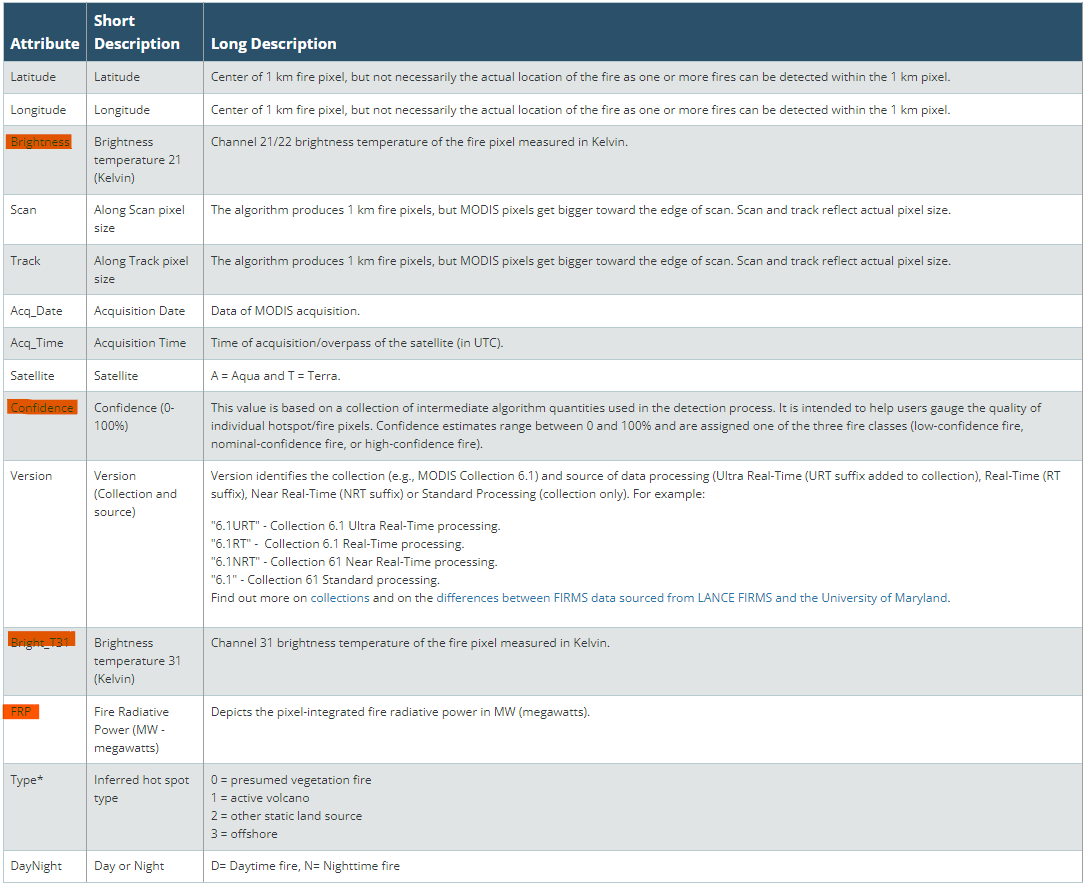

In [ ]:
df_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155979 entries, 0 to 155978
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  155979 non-null  int64  
 1   country_id  155979 non-null  object 
 2   latitude    155979 non-null  float64
 3   longitude   155979 non-null  float64
 4   brightness  155979 non-null  float64
 5   scan        155979 non-null  float64
 6   track       155979 non-null  float64
 7   acq_date    155979 non-null  object 
 8   acq_time    155979 non-null  int64  
 9   satellite   155979 non-null  object 
 10  instrument  155979 non-null  object 
 11  confidence  155979 non-null  int64  
 12  version     155979 non-null  object 
 13  bright_t31  155979 non-null  float64
 14  frp         155979 non-null  float64
 15  daynight    155979 non-null  object 
dtypes: float64(7), int64(3), object(6)
memory usage: 19.0+ MB


In [ ]:
df_rus.describe()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
count,155979.000000,155979.000000,155979.000000,155979.000000,155979.000000,155979.000000,155979.000000,155979.000000,155979.000000,155979.000000
mean,77989.000000,60.264361,116.721200,326.092249,1.539398,1.191858,872.274216,67.810135,293.941581,55.758250
std,45027.403156,6.160149,20.574652,21.276548,0.749549,0.228801,607.330162,26.126903,8.860492,124.459364
min,0.000000,41.618130,-178.413620,300.000000,1.000000,1.000000,3.000000,0.000000,265.030000,0.000000
25%,38994.500000,55.146885,115.476285,311.730000,1.050000,1.020000,357.000000,50.000000,288.980000,13.780000
50%,77989.000000,59.642400,120.058420,322.150000,1.220000,1.100000,559.000000,72.000000,294.260000,26.110000
75%,116983.500000,63.557610,127.255670,333.640000,1.710000,1.280000,1259.000000,90.000000,299.400000,52.825000
max,155978.000000,80.867070,172.405930,509.980000,4.820000,2.000000,2358.000000,100.000000,400.070000,5797.290000


In [ ]:
!pip install geodatasets cartopy

import geopandas
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

In [ ]:
!pip install geemap earthengine-api geopandas

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


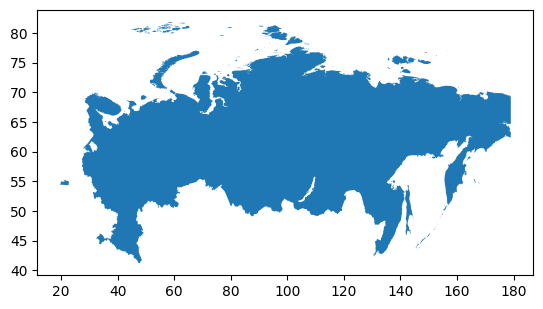

In [ ]:
# прочекали границы выбранной области
rus_borders = geopandas.read_file('ru.json')

rus_borders.plot();

In [ ]:
import ee
import geemap
import geopandas as gpd

In [ ]:
ee.Authenticate()

True

In [ ]:
ee.Initialize(project='modis-proba')

In [ ]:
geojson_path = 'ru.json'
geojson = gpd.read_file(geojson_path)
region = geemap.geojson_to_ee(geojson.__geo_interface__)

start_date = '2024-07-01'
end_date = '2024-07-31'

In [ ]:
# отобрали снимки покрывающие выбранный регион (россию)
modis_sr = ee.ImageCollection('MODIS/061/MOD09GA').filterDate(start_date, end_date).filterBounds(region)
modis_fire = ee.ImageCollection('MODIS/061/MOD14A1').filterDate(start_date, end_date).filterBounds(region)


def mask_fires(image):
    fire_mask = modis_fire.max().select('FireMask')
    return image.updateMask(fire_mask.lt(8))

modis_masked = modis_sr.map(mask_fires)

In [ ]:
# тестим адекватность
Map = geemap.Map()
Map.centerObject(region, 6)
Map.addLayer(modis_sr.mean(), {'min': 300, 'max': 400})
Map.addLayer(region, {}, 'Region')

In [ ]:
# на самом деле я слишком недооценила процесс поиска и работы со снимками, на чем и засела на n-ое количество дней
# это просто самый душный никак не заканчивающийся раздел Т_Т
# и не смотря на так то кучу работы толком то и не сделалось ничего (а просто линрег на данных насы фирмс это фигня, хочется торч и смотреть в объеме и пространстве)

## 3. Обучение модели

In [ ]:
# в процессе резерча нашелся невероятный пакет TorchGeo!!!!!!!!
# https://github.com/microsoft/torchgeo << им все кредиты

## 4. Методы улучшения результата
TODOOOOOOOOOOOOOOOOOOOOOO!!!!!!!!!!!!!!!!!

## 5. Итоги и карта гитхаба

In [ ]:
# как я уже выше написала, толком то ничего и не успелось (но и начинать надо было, конечно, не за 5 дней до дд, но ээ))))))
# на самом деле мне мега понравилось, и я в течение первого семестра даже для себя добью до чего-то осознанного, на удивление геоинформатика это че то прикольное

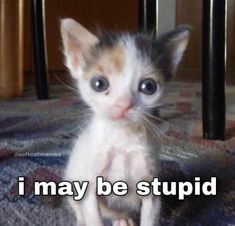

`ru.shp, ru.json` - ГИС границы РФ

`MODIS_RUS_07-01_08-01.csv` - эталонные результаты работы алгоритма NASA FIRMS по определению термальных аномалий (так сказать, игреки)

